In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

# 1. Data Preparation:

In [ ]:
data=pd.read_excel("heart_disease.xlsx",sheet_name="Heart_disease")

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [ ]:
data.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [ ]:
data.shape

(908, 13)

In [ ]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [ ]:
data[['restecg']].value_counts()

,count
restecg,
normal,542
lv hypertrophy,187
st-t abnormality,179


In [ ]:
data[['slope']].value_counts()

,count
slope,
flat,453
upsloping,298
downsloping,157


In [ ]:
data[['cp']].value_counts()

,count
cp,
asymptomatic,495
non-anginal,203
atypical angina,165
typical angina,45


In [ ]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [ ]:
data.duplicated().sum()

1

In [ ]:
data[data.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
765,58,Male,non-anginal,150,219,False,st-t abnormality,118,True,0.0,downsloping,normal,2


# 2. Exploratory Data Analysis (EDA):

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
#treating null value
data['oldpeak'].fillna(data['oldpeak'].mean(),inplace=True)

In [ ]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


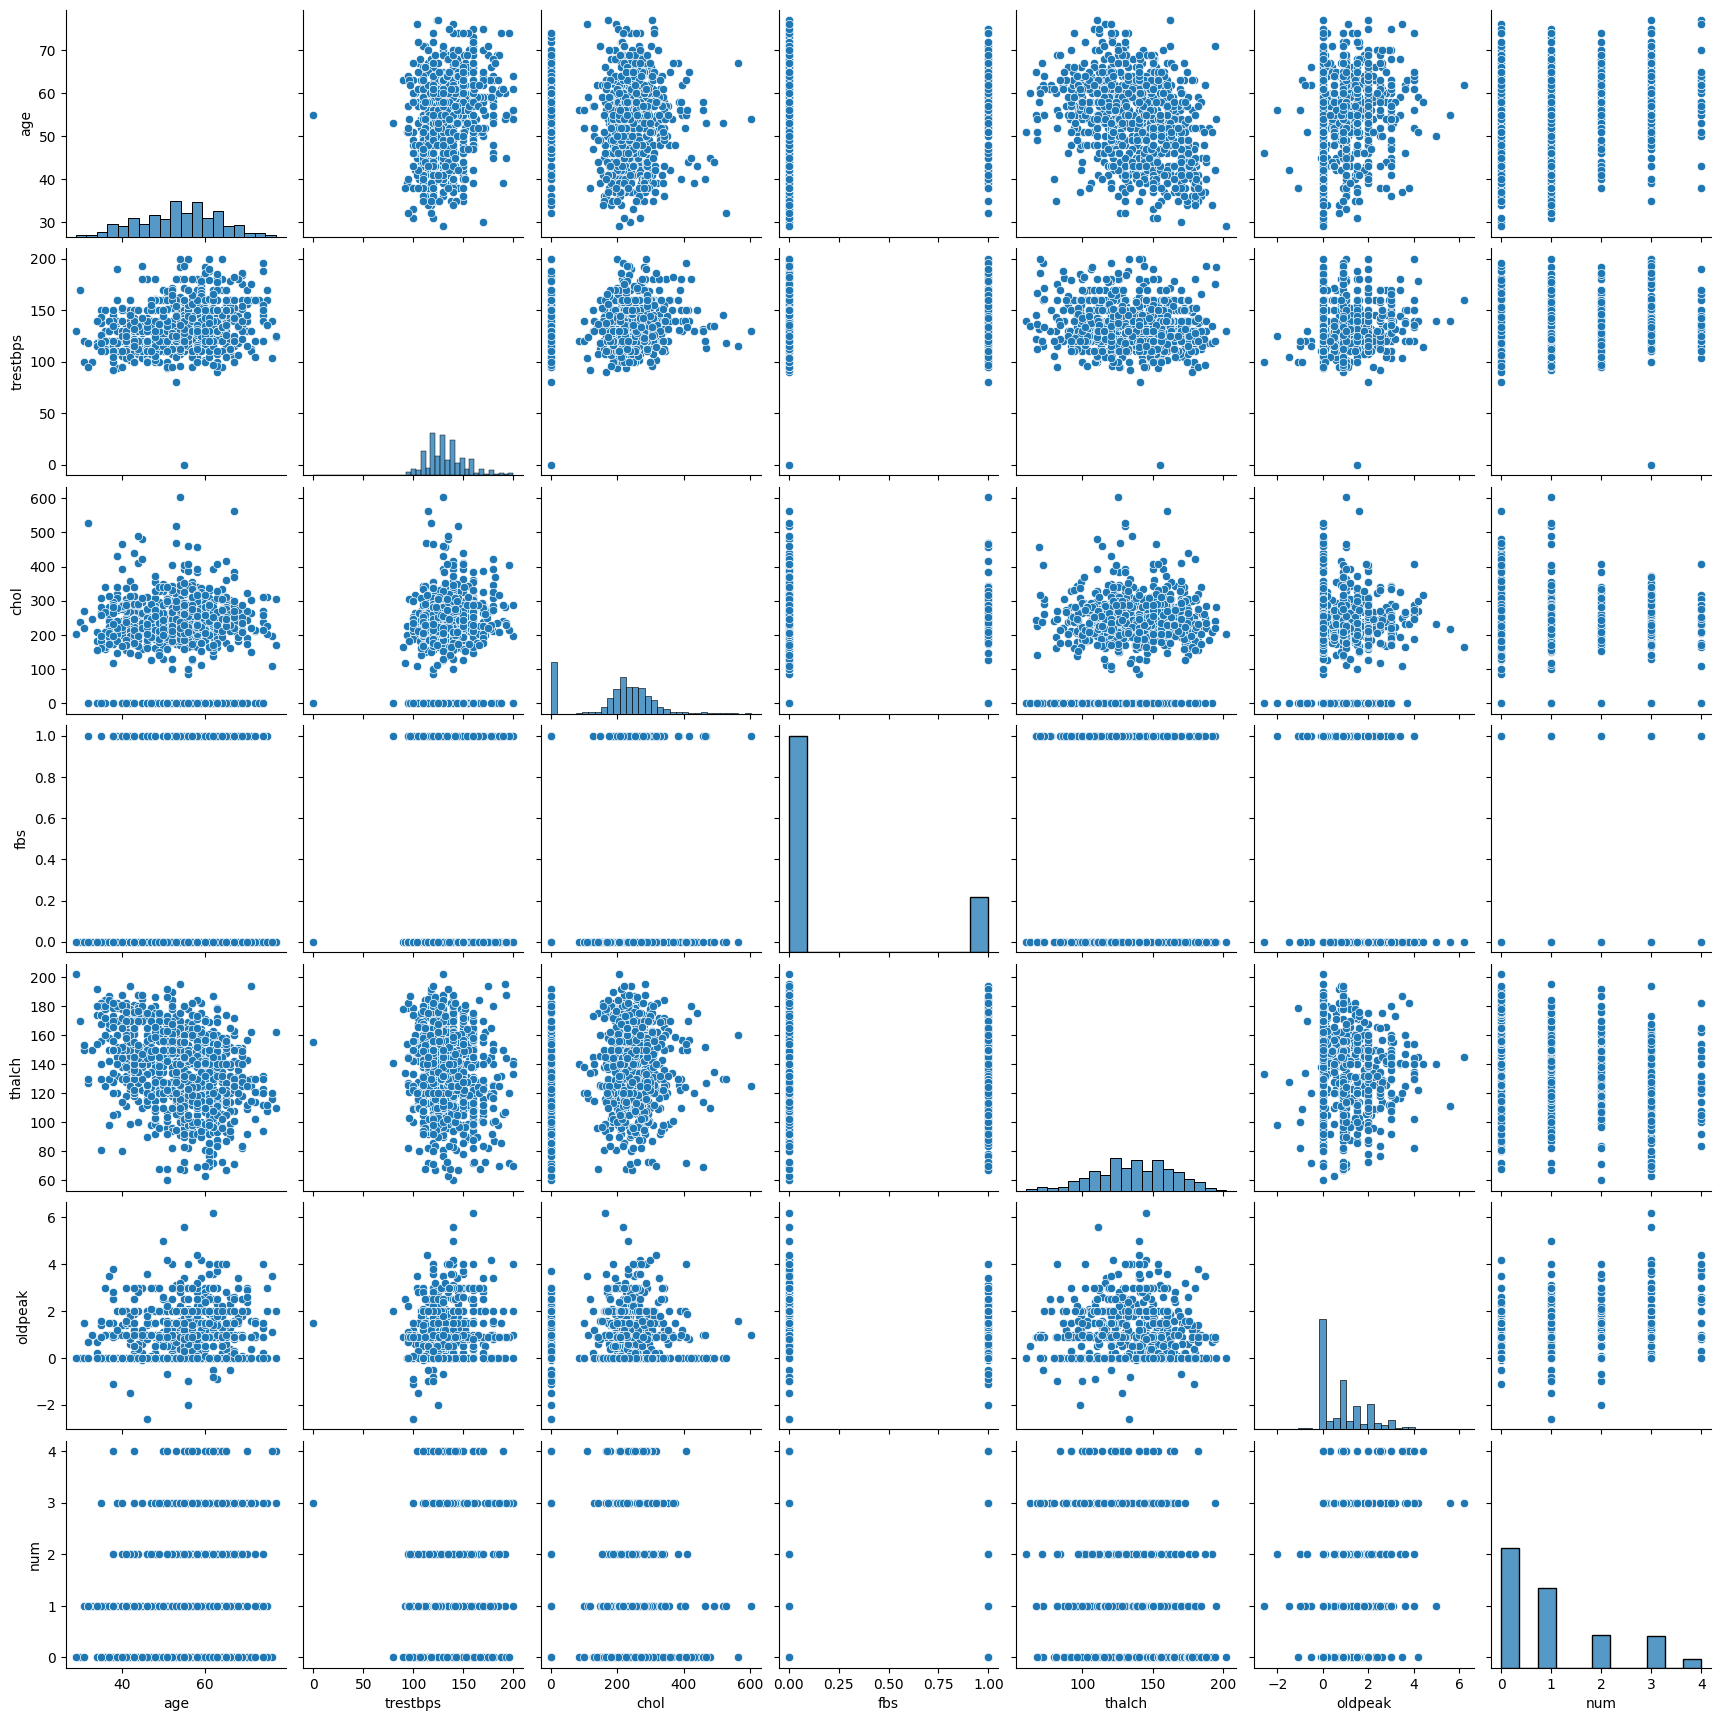

In [ ]:
sns.pairplot(data)
plt.show()

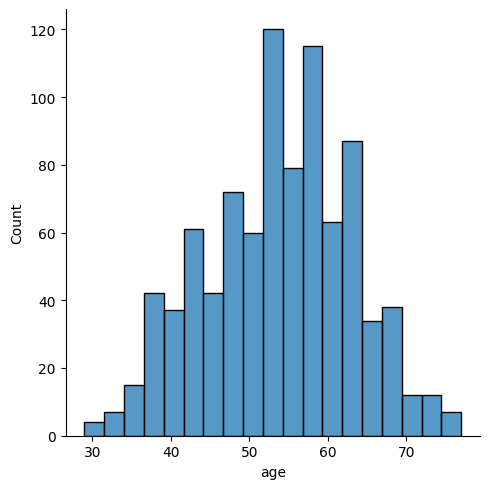

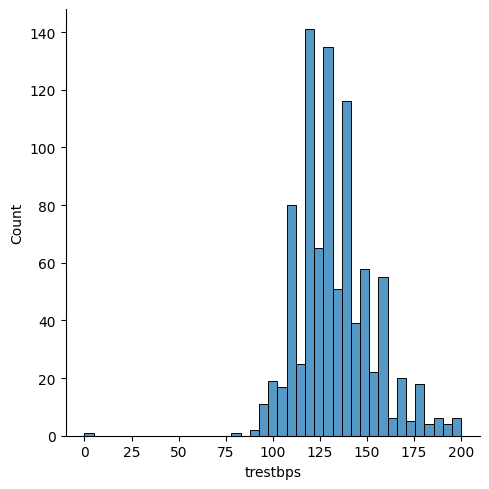

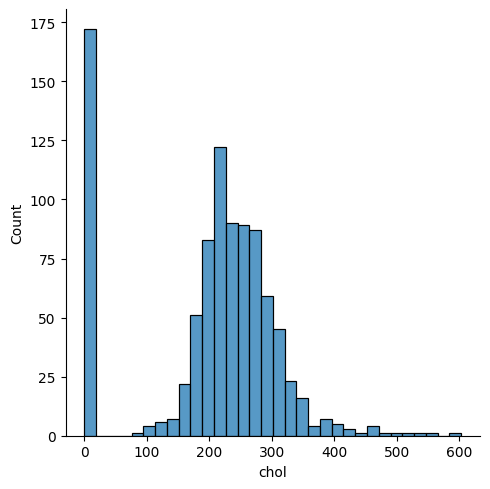

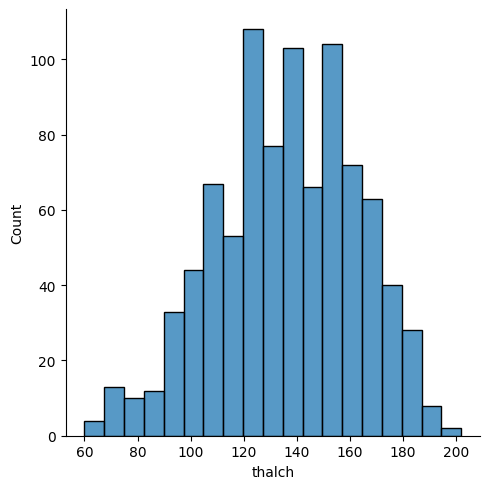

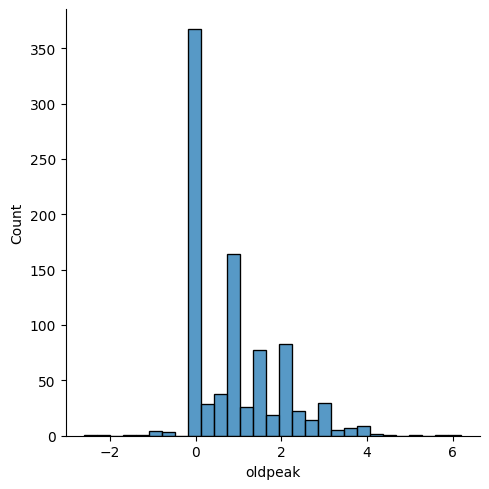

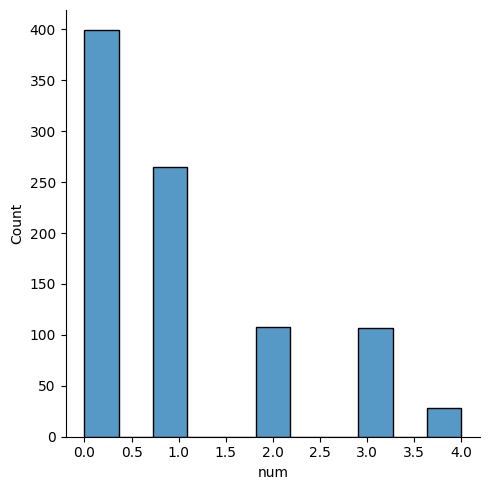

In [ ]:
numeric_col=data.select_dtypes(include=['int','float']).columns
for col in numeric_col:
  sns.displot(data[col])
  plt.show()

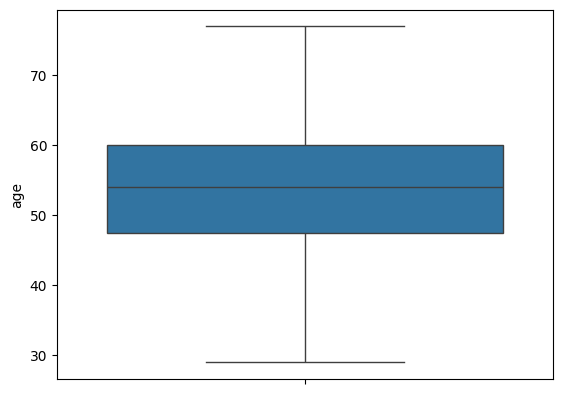

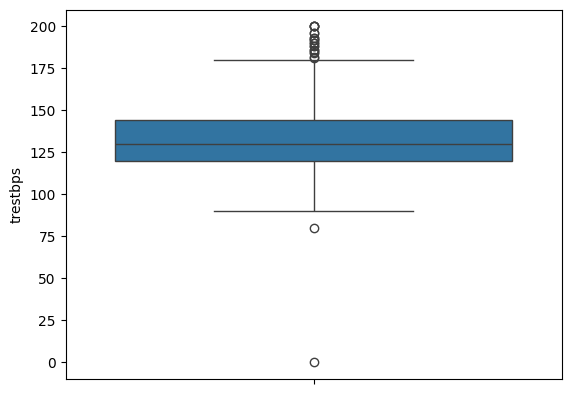

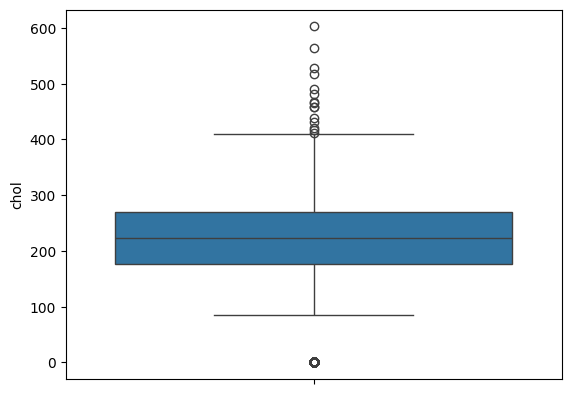

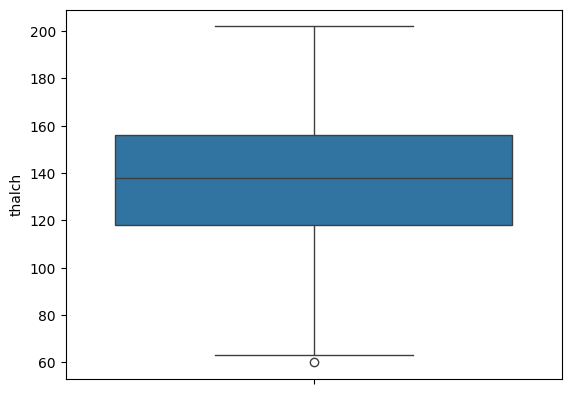

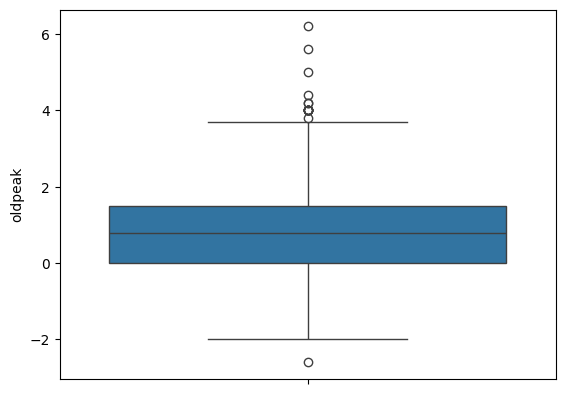

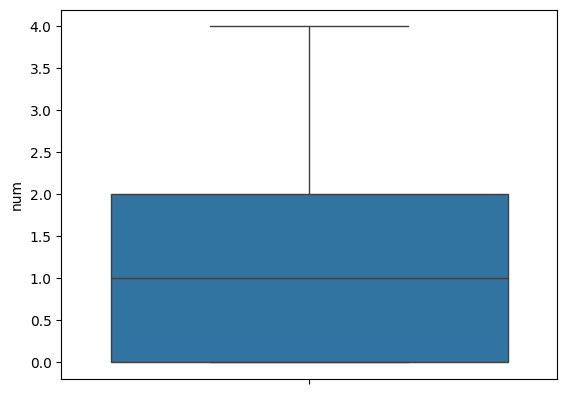

In [ ]:
for col in numeric_col:
  sns.boxplot(data[col])
  plt.show()

# 3. Feature Engineering:

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
data['restecg']=le.fit_transform(data['restecg'])
data['slope']=le.fit_transform(data['slope'])
data['cp']=le.fit_transform(data['cp'])
data['sex']=le.fit_transform(data['sex'])
data['fbs']=le.fit_transform(data['fbs'])
data['thal']=le.fit_transform(data['thal'])

In [ ]:
data['exang']=(data['exang'].map({0:'0',1:'1'}))

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,0,2.3,0,0,0
1,41,1,1,135,203,0,1,132,0,0.0,1,0,0
2,57,1,0,140,192,0,1,148,0,0.4,1,0,0
3,52,1,3,118,186,0,0,190,0,0.0,1,0,0
4,57,1,0,110,201,0,1,126,1,1.5,1,0,0


In [ ]:
feature=data.drop(['num'],axis=1)

In [ ]:
col_name=feature.columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
MM=MinMaxScaler()

In [ ]:
new_data=MM.fit_transform(feature)
new_data=pd.DataFrame(new_data,columns=col_name)

In [ ]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,0.708333,1.0,1.000000,0.725,0.386401,1.0,0.0,0.633803,0.0,0.556818,0.0,0.0
1,0.250000,1.0,0.333333,0.675,0.336650,0.0,0.5,0.507042,0.0,0.295455,0.5,0.0
2,0.583333,1.0,0.000000,0.700,0.318408,0.0,0.5,0.619718,0.0,0.340909,0.5,0.0
3,0.479167,1.0,1.000000,0.590,0.308458,0.0,0.0,0.915493,0.0,0.295455,0.5,0.0
4,0.583333,1.0,0.000000,0.550,0.333333,0.0,0.5,0.464789,1.0,0.465909,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
902,0.500000,1.0,0.000000,0.625,0.000000,0.0,0.5,0.422535,0.0,0.465909,1.0,1.0
903,0.687500,1.0,0.000000,0.830,0.281924,0.0,1.0,0.422535,1.0,0.636364,0.5,1.0
904,0.562500,1.0,0.666667,0.850,0.000000,0.0,0.0,0.443662,1.0,0.579545,0.0,0.5
905,0.562500,1.0,0.666667,0.720,0.344942,1.0,1.0,0.316901,NaN,0.396853,0.0,0.0


In [ ]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
age,1.000000,0.051947,-0.068305,0.253709,-0.100059,0.177004,-0.008336,-0.327868,0.183486,0.233303,-0.053886,0.058829,0.326227
sex,0.051947,1.000000,-0.125986,0.015988,-0.191632,0.092480,0.077376,-0.178484,0.180349,0.101775,-0.044191,0.068596,0.259258
cp,-0.068305,-0.125986,1.000000,0.007944,0.071005,-0.044562,-0.074455,0.249440,-0.371550,-0.169483,0.094762,-0.079809,-0.314480
trestbps,0.253709,0.015988,0.007944,1.000000,0.117392,0.112124,0.056824,-0.132841,0.147414,0.153079,0.008262,0.056620,0.136581
chol,-0.100059,-0.191632,0.071005,0.117392,1.000000,-0.113651,-0.195021,0.198074,-0.041666,0.028892,0.047655,-0.016900,-0.239065
fbs,0.177004,0.092480,-0.044562,0.112124,-0.113651,1.000000,0.068311,-0.065827,0.008065,0.022336,-0.027616,-0.017400,0.156839
restecg,-0.008336,0.077376,-0.074455,0.056824,-0.195021,0.068311,1.000000,-0.194343,0.058944,-0.030089,-0.082107,-0.111874,0.035053
thalch,-0.327868,-0.178484,0.249440,-0.132841,0.198074,-0.065827,-0.194343,1.000000,-0.347746,-0.129477,0.223212,0.005985,-0.322632
exang,0.183486,0.180349,-0.371550,0.147414,-0.041666,0.008065,0.058944,-0.347746,1.000000,0.386612,-0.159260,0.110712,0.381656
oldpeak,0.233303,0.101775,-0.169483,0.153079,0.028892,0.022336,-0.030089,-0.129477,0.386612,1.000000,-0.186814,0.090347,0.417748


# 4. Decision Tree Classification:

In [ ]:
x=new_data
y=data['num']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
decision_tree=DecisionTreeClassifier()

In [ ]:
dec_tree=DecisionTreeClassifier()

In [ ]:
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
print(dec_tree.score(x_train,y_train))
print(dec_tree.score(x_test,y_test))

0.6951724137931035
0.510989010989011


In [ ]:
y_pred=dec_tree.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

In [ ]:
accuracy_score(y_test,y_pred)

0.510989010989011

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[70 13  3  3  0]
 [15 20  6  5  1]
 [ 4  9  2  3  2]
 [ 2 11  3  1  0]
 [ 2  3  1  3  0]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77        89
           1       0.36      0.43      0.39        47
           2       0.13      0.10      0.11        20
           3       0.07      0.06      0.06        17
           4       0.00      0.00      0.00         9

    accuracy                           0.51       182
   macro avg       0.26      0.27      0.27       182
weighted avg       0.48      0.51      0.49       182



# 5. Hyperparameter Tuning:

In [ ]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=6 , min_samples_split=4 , ccp_alpha = 0.03)
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.03, criterion='entropy', max_depth=6,
                       min_samples_split=4)

# 6. Model Evaluation and Analysis:

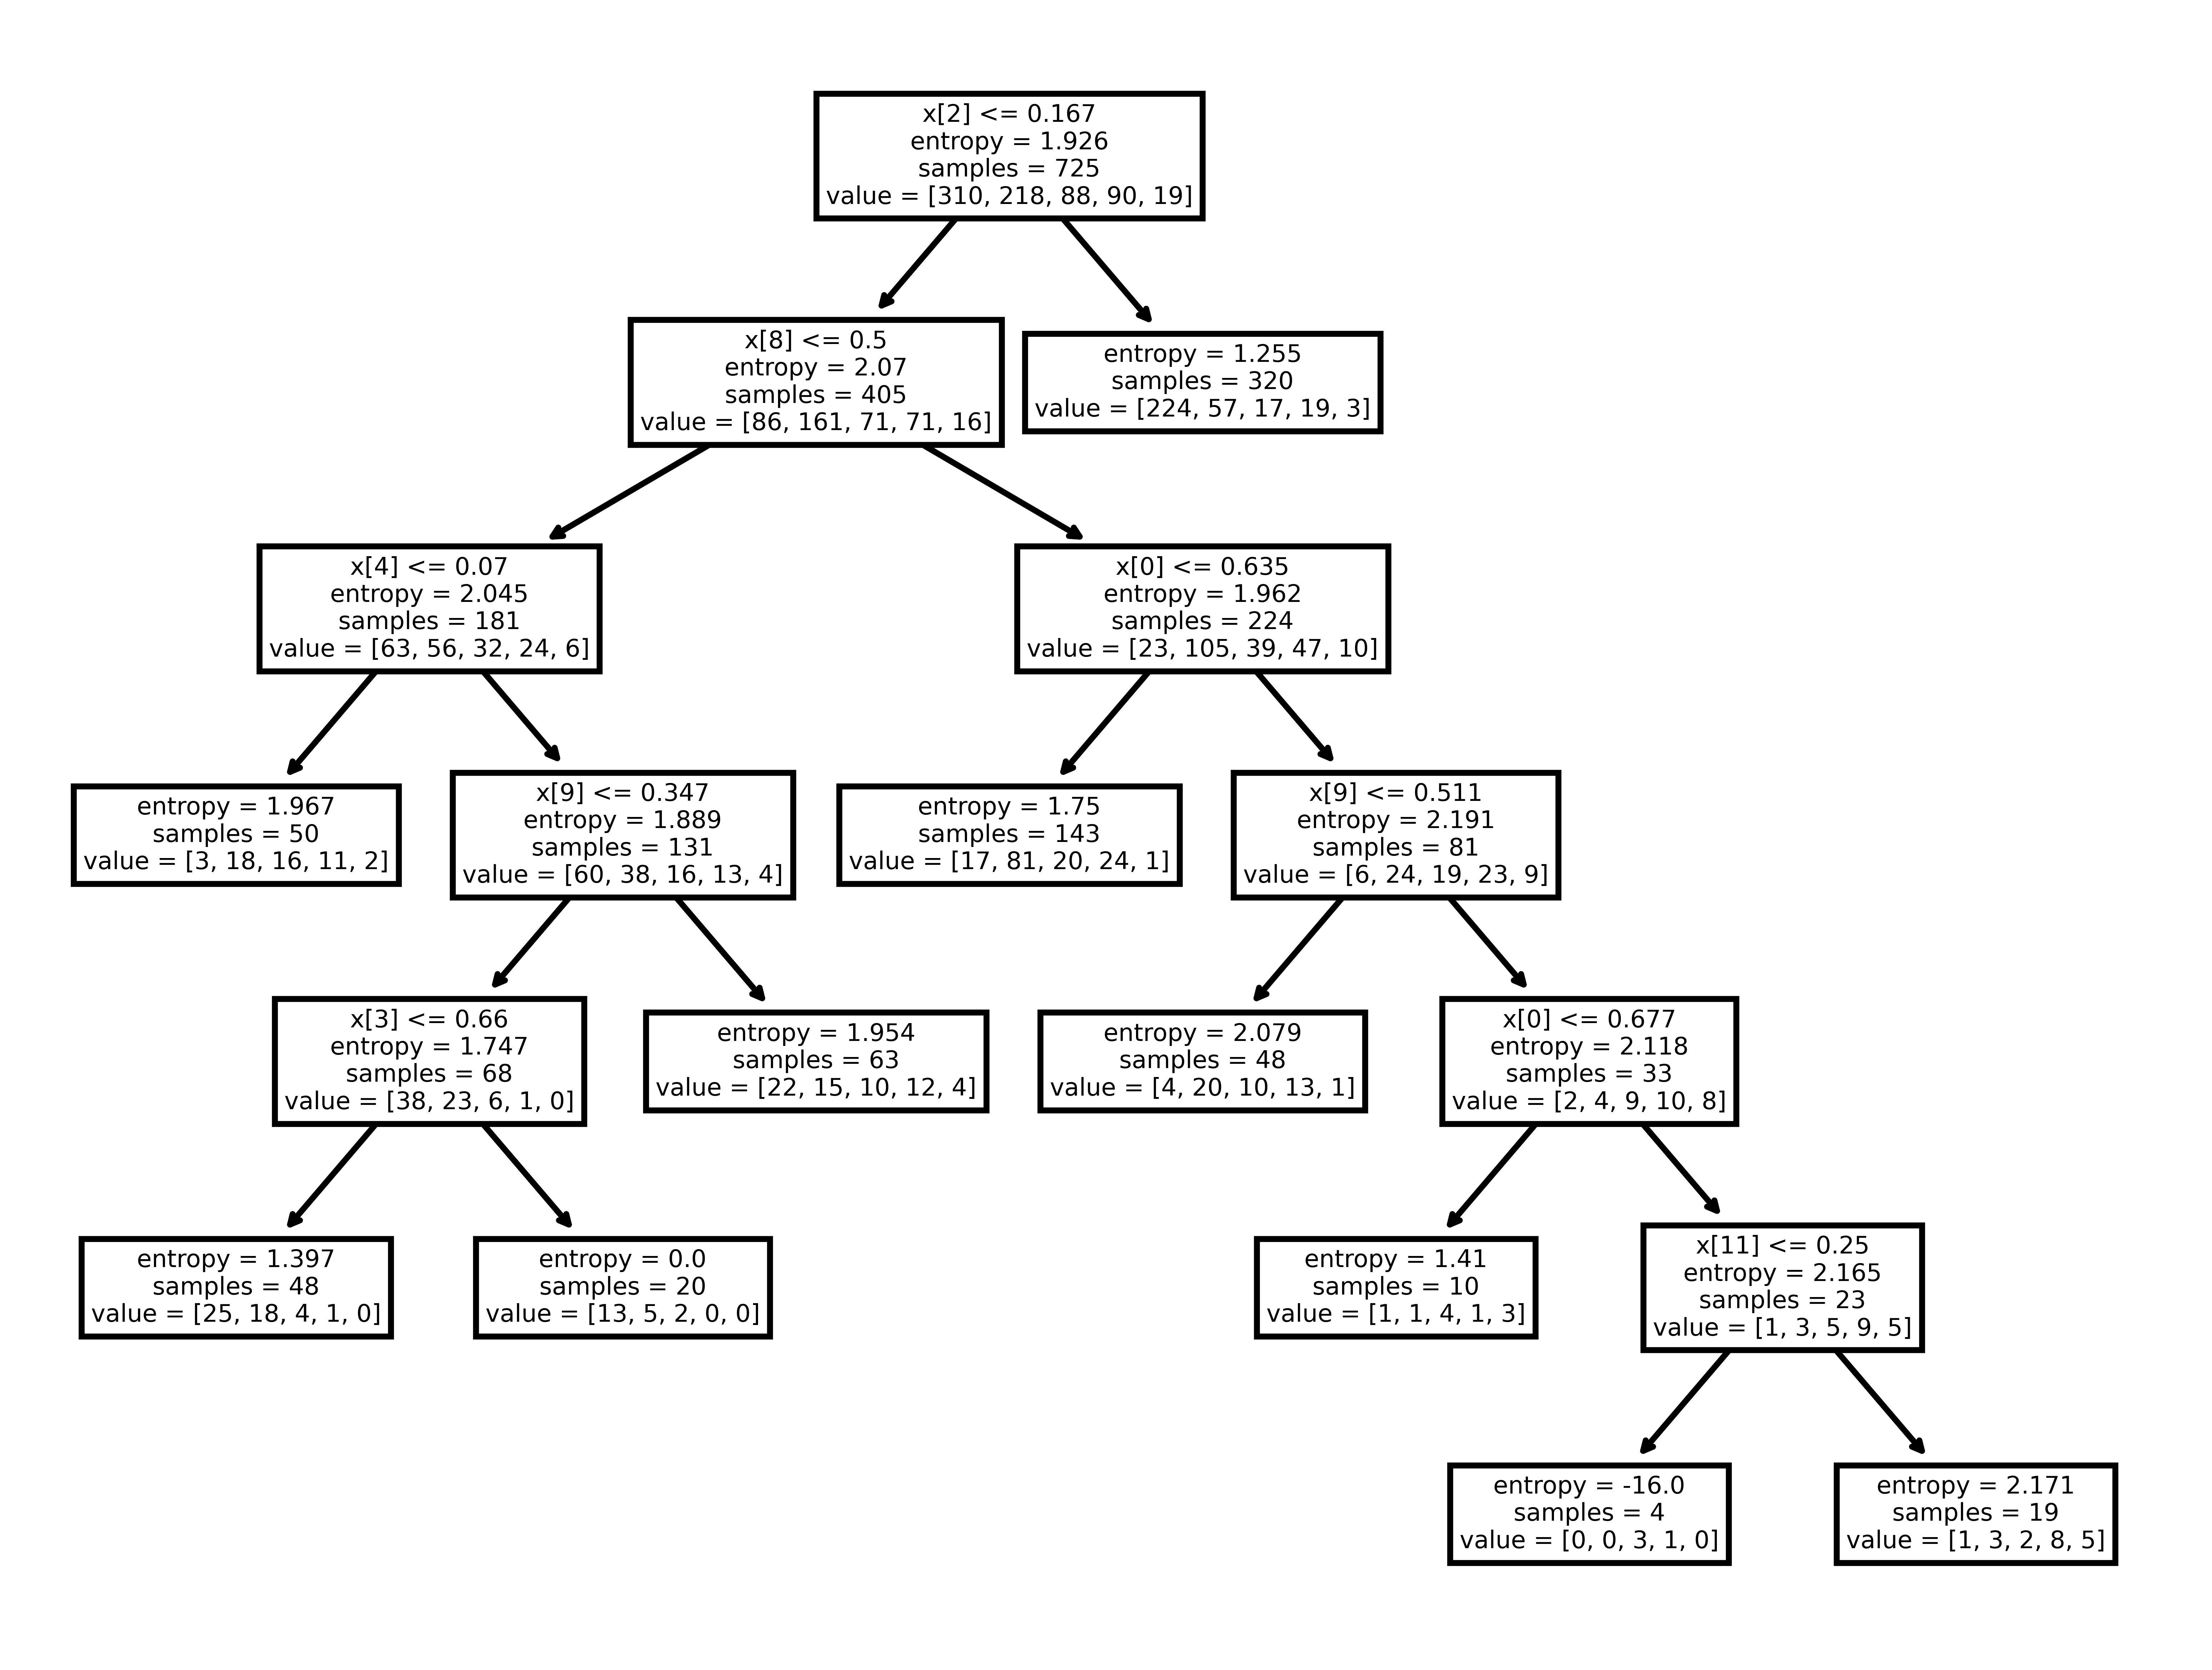

In [ ]:
plt.figure(dpi=1200)
tree.plot_tree(model);

In [ ]:
pred_test = model.predict(x_test)  #predicting on test data
pred_test

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 3, 0, 1, 3, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0])

In [ ]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.71      0.92      0.80        89
           1       0.48      0.62      0.54        47
           2       1.00      0.10      0.18        20
           3       0.25      0.06      0.10        17
           4       0.00      0.00      0.00         9

    accuracy                           0.63       182
   macro avg       0.49      0.34      0.32       182
weighted avg       0.60      0.63      0.56       182



In [ ]:
pred_train = model.predict(x_train)  #predicting on train data
print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.63      0.92      0.75       310
           1       0.49      0.55      0.52       218
           2       0.50      0.08      0.14        88
           3       0.42      0.09      0.15        90
           4       0.00      0.00      0.00        19

    accuracy                           0.58       725
   macro avg       0.41      0.33      0.31       725
weighted avg       0.53      0.58      0.51       725



# Interview Questions:

1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
 - criterion: Measures split quality (gini or entropy).
 - max_depth: Limits tree depth (deeper = more complex, risk of overfitting).
 - min_samples_split: Minimum samples for a split (higher = less overfitting).
 -min_samples_leaf: Minimum samples for a leaf (higher = less overfitting).
 - ccp_alpha: Pruning parameter (higher = more pruning, simpler tree).

2. What is the difference between the Label encoding and One-hot encoding?

* Label Encoding: Assigns a unique integer to each category. Useful for ordinal data where order matters.

* One-Hot Encoding: Creates a new binary column for each category. Only one column is "1" for each sample, representing the corresponding category. Useful for nominal data without inherent order.